In [2]:
from temporal_random_walk import LinearRandomPicker, ExponentialIndexRandomPicker, UniformRandomPicker

In [3]:
N_TRIALS = 100_000
HI = 20

In [4]:
def test_pickers(picker, prioritize_end, hi, n_trials=N_TRIALS):
    counts = [0] * hi
    
    for _ in range(n_trials):
        picked_num = picker.pick_random(0, hi, prioritize_end)
        counts[picked_num] += 1
    
    return counts

In [5]:
import matplotlib.pyplot as plt

def plot_number_picked(counts):
    plt.plot(counts)
    
    plt.xlabel('Number')
    plt.ylabel('Times Picked')
    
    plt.show()

In [6]:
counts_linear_end_prioritized = test_pickers(LinearRandomPicker(), True, hi=HI)

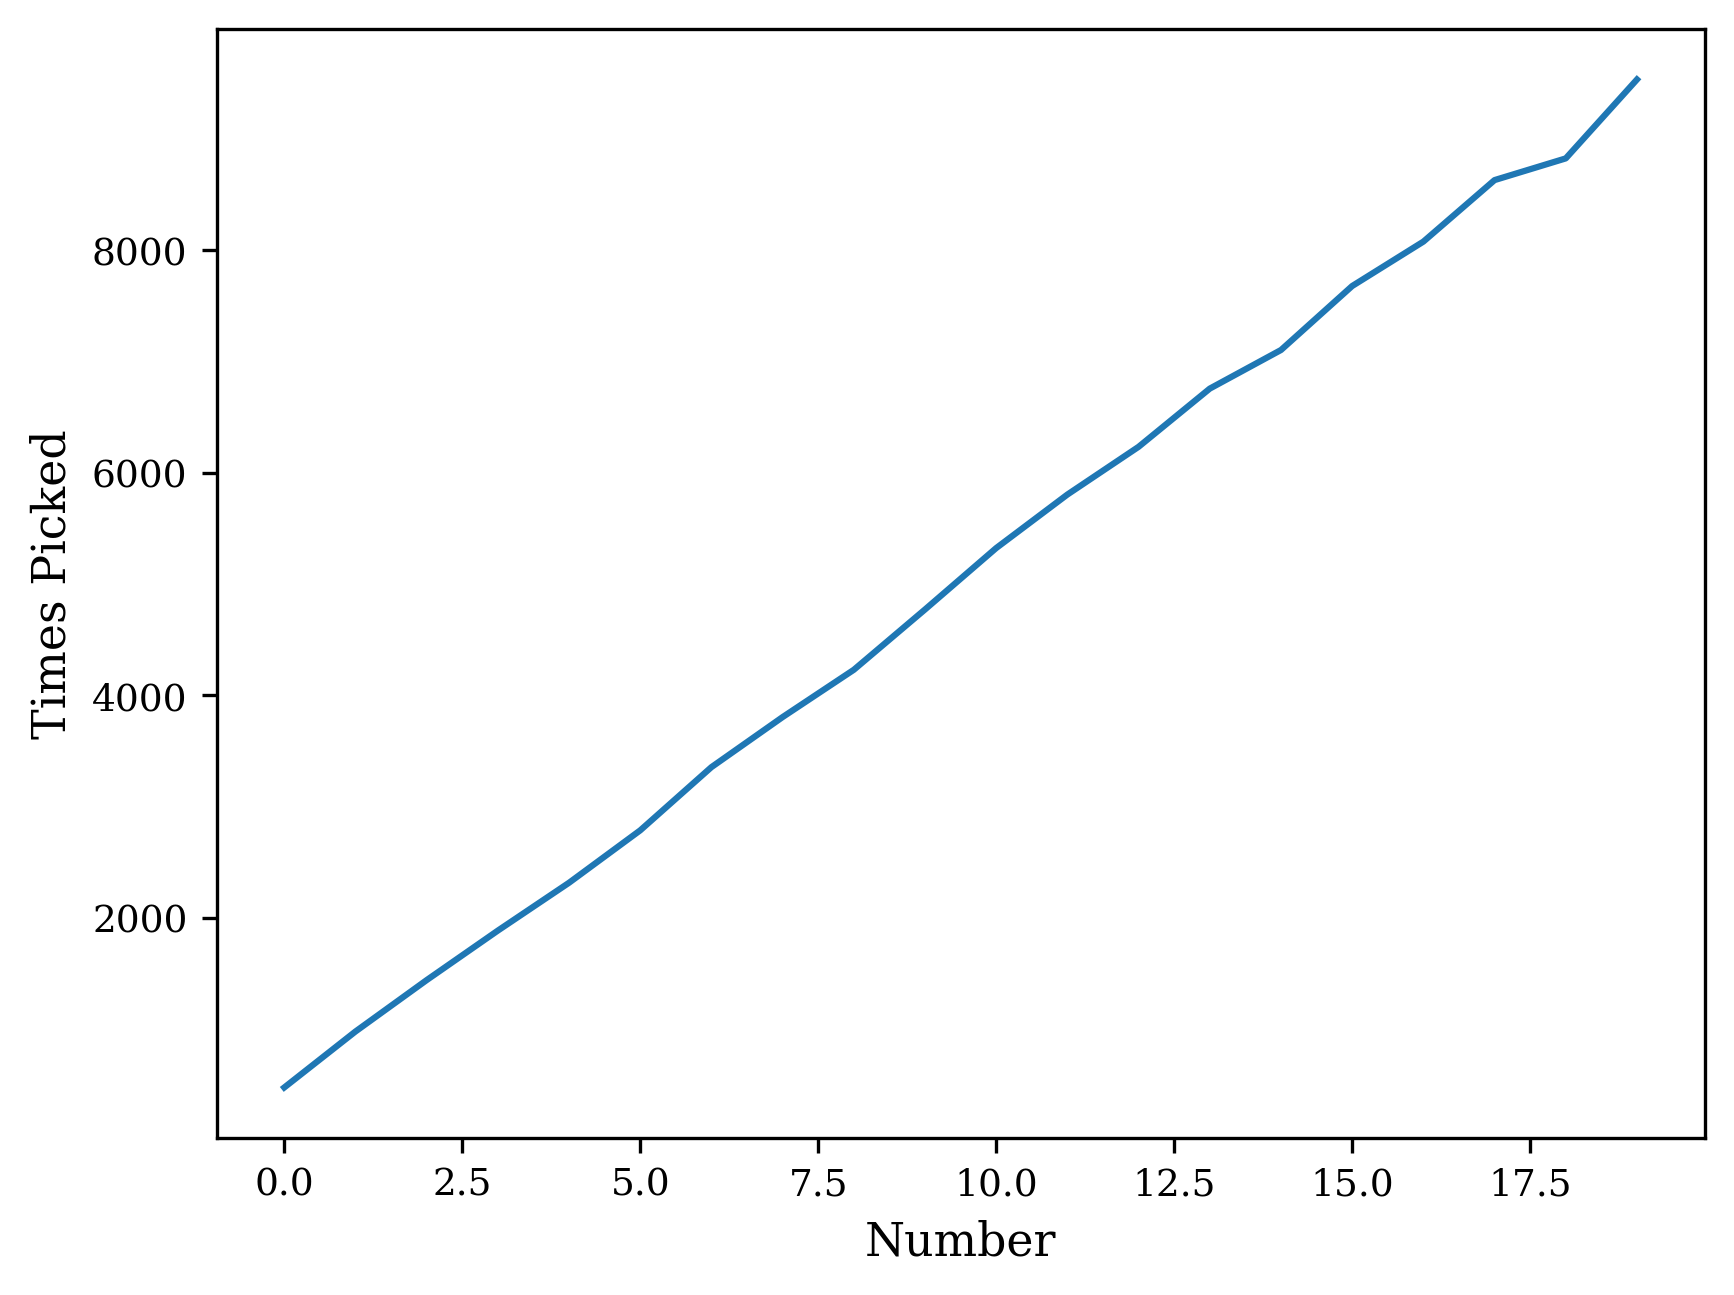

In [7]:
plot_number_picked(counts_linear_end_prioritized)

In [8]:
counts_linear_start_prioritized = test_pickers(LinearRandomPicker(), False, hi=HI)

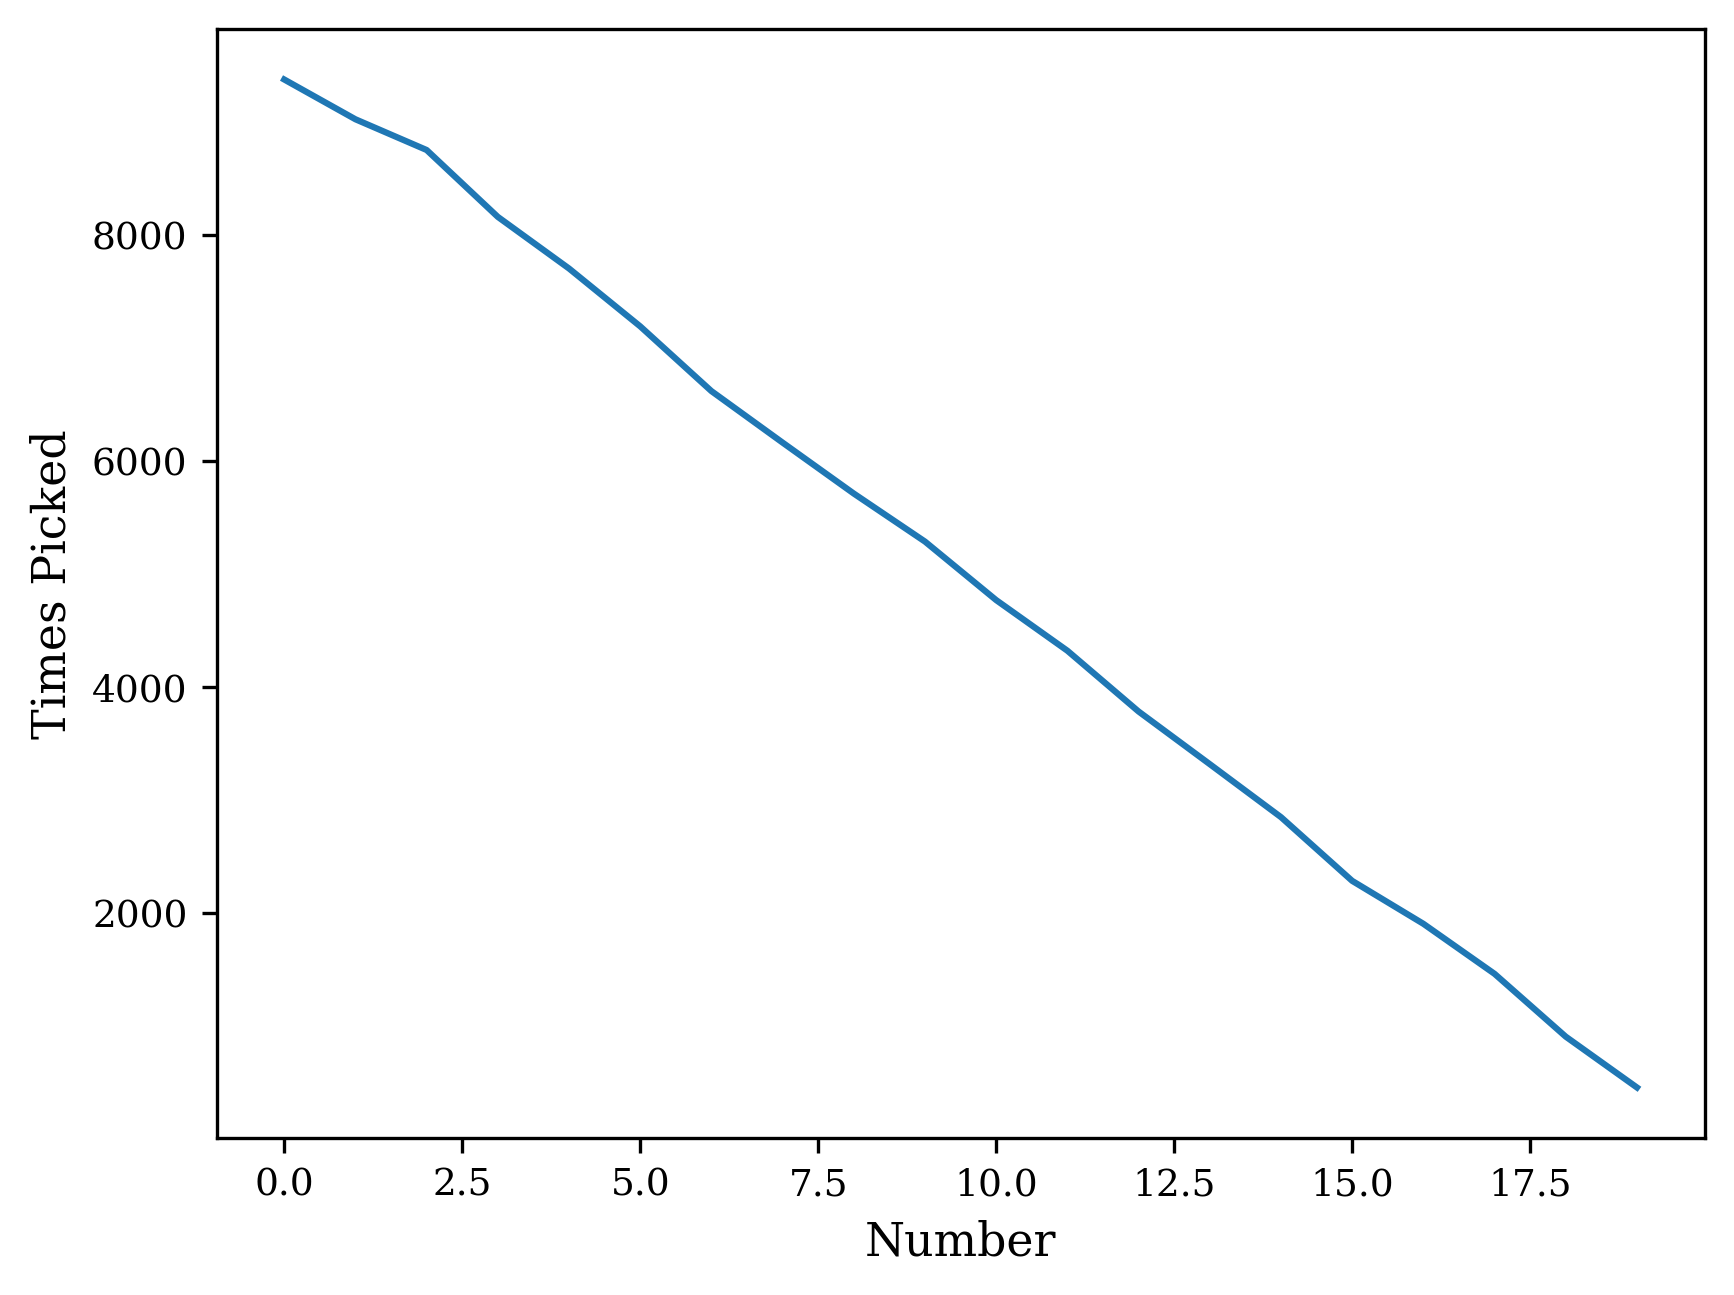

In [9]:
plot_number_picked(counts_linear_start_prioritized)

In [10]:
import numpy as np

class PyExponentialRandomPicker:
    def __init__(self, decay_rate=1.0):
        self.decay_rate = decay_rate

    def pick_random(self, start, end, prioritize_end=True):
        if start >= end:
            raise ValueError("Start must be less than end.")
        
        length = end - start
        indices = np.arange(length)
    
        if prioritize_end:
            weights = np.exp(self.decay_rate * indices)
        else:
            weights = np.exp(-self.decay_rate * indices)
    
        probabilities = weights / weights.sum()
        random_index = np.random.choice(indices, p=probabilities)
    
        return start + random_index

In [11]:
counts_exp_end_prioritized = test_pickers(ExponentialIndexRandomPicker(), True, hi=HI)

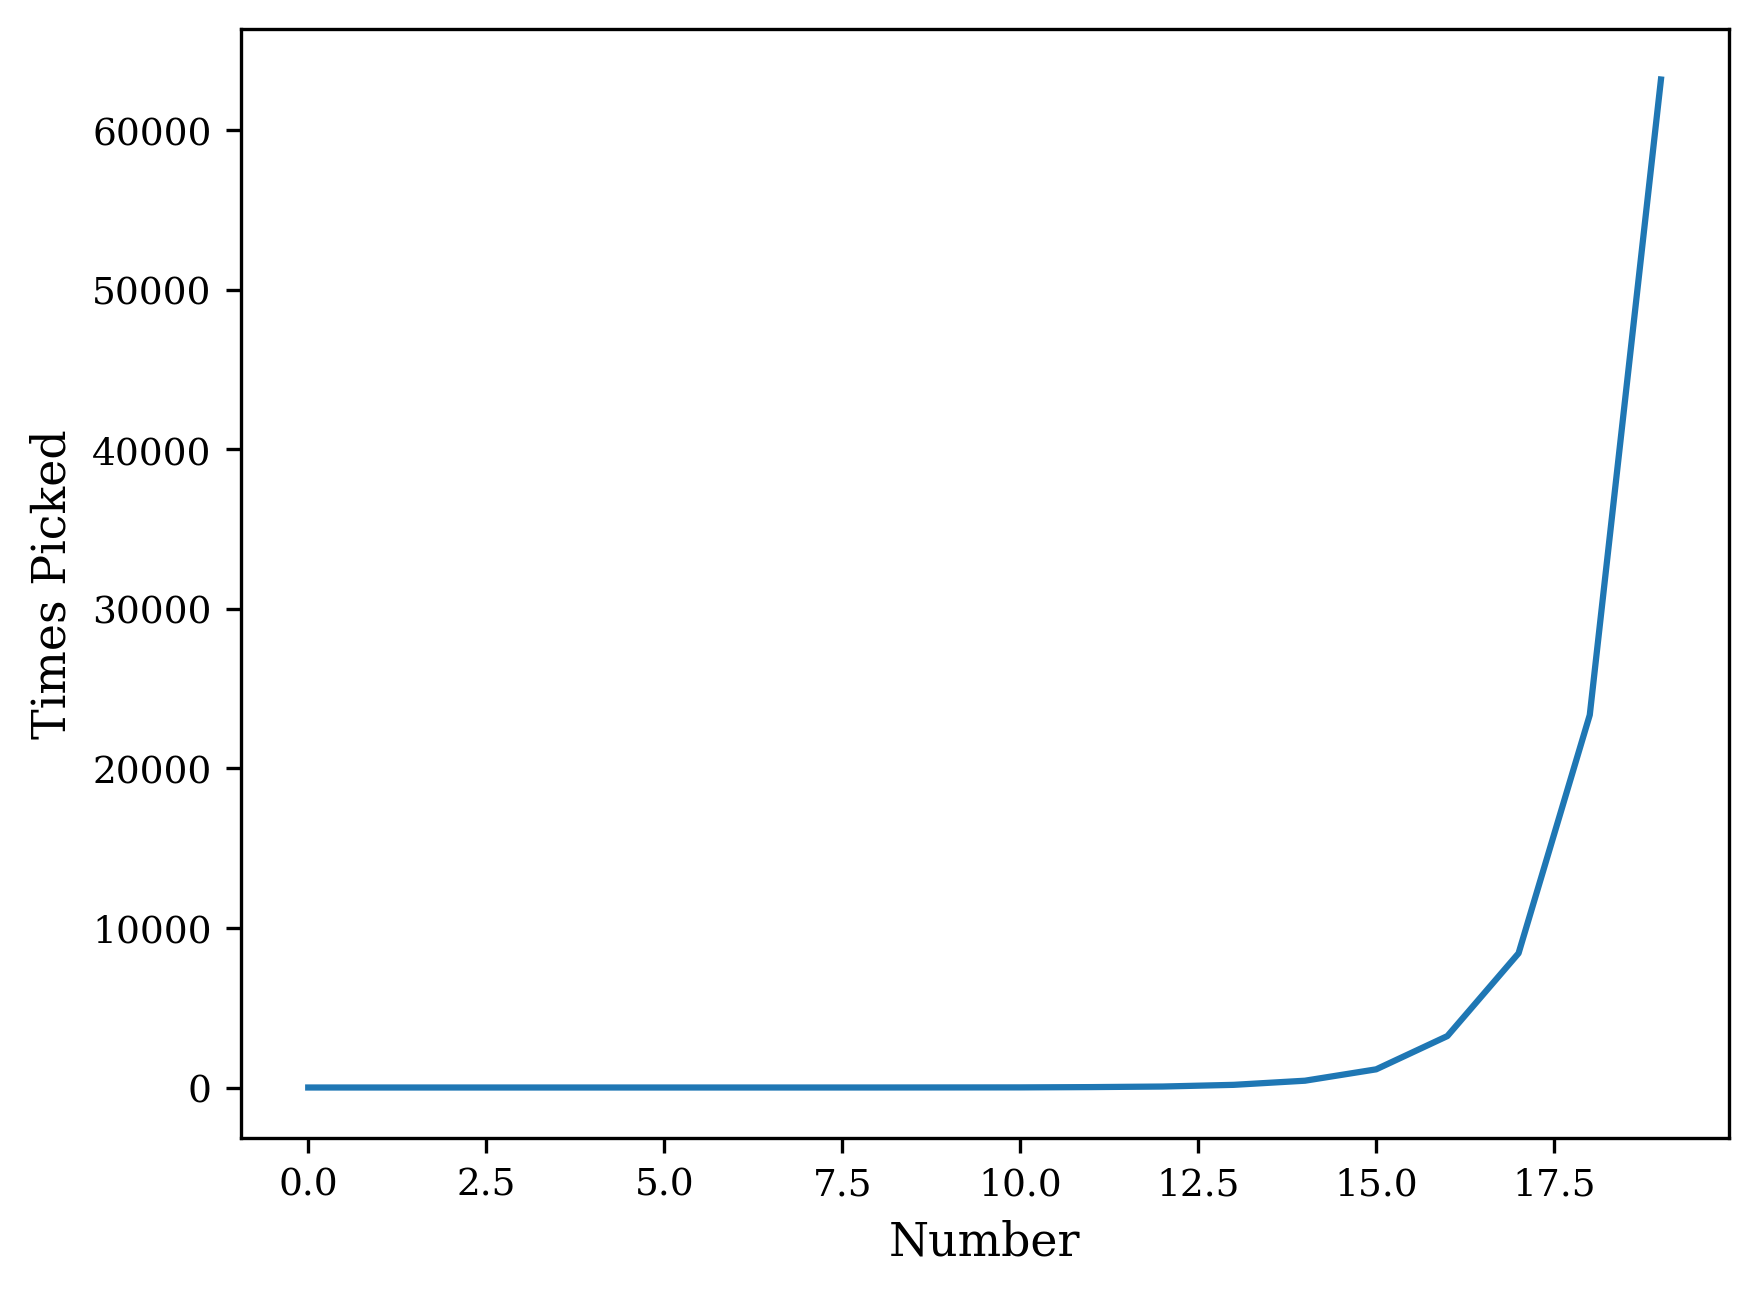

In [12]:
plot_number_picked(counts_exp_end_prioritized)

In [13]:
counts_exp_py_end_prioritized = test_pickers(PyExponentialRandomPicker(), True, hi=HI)

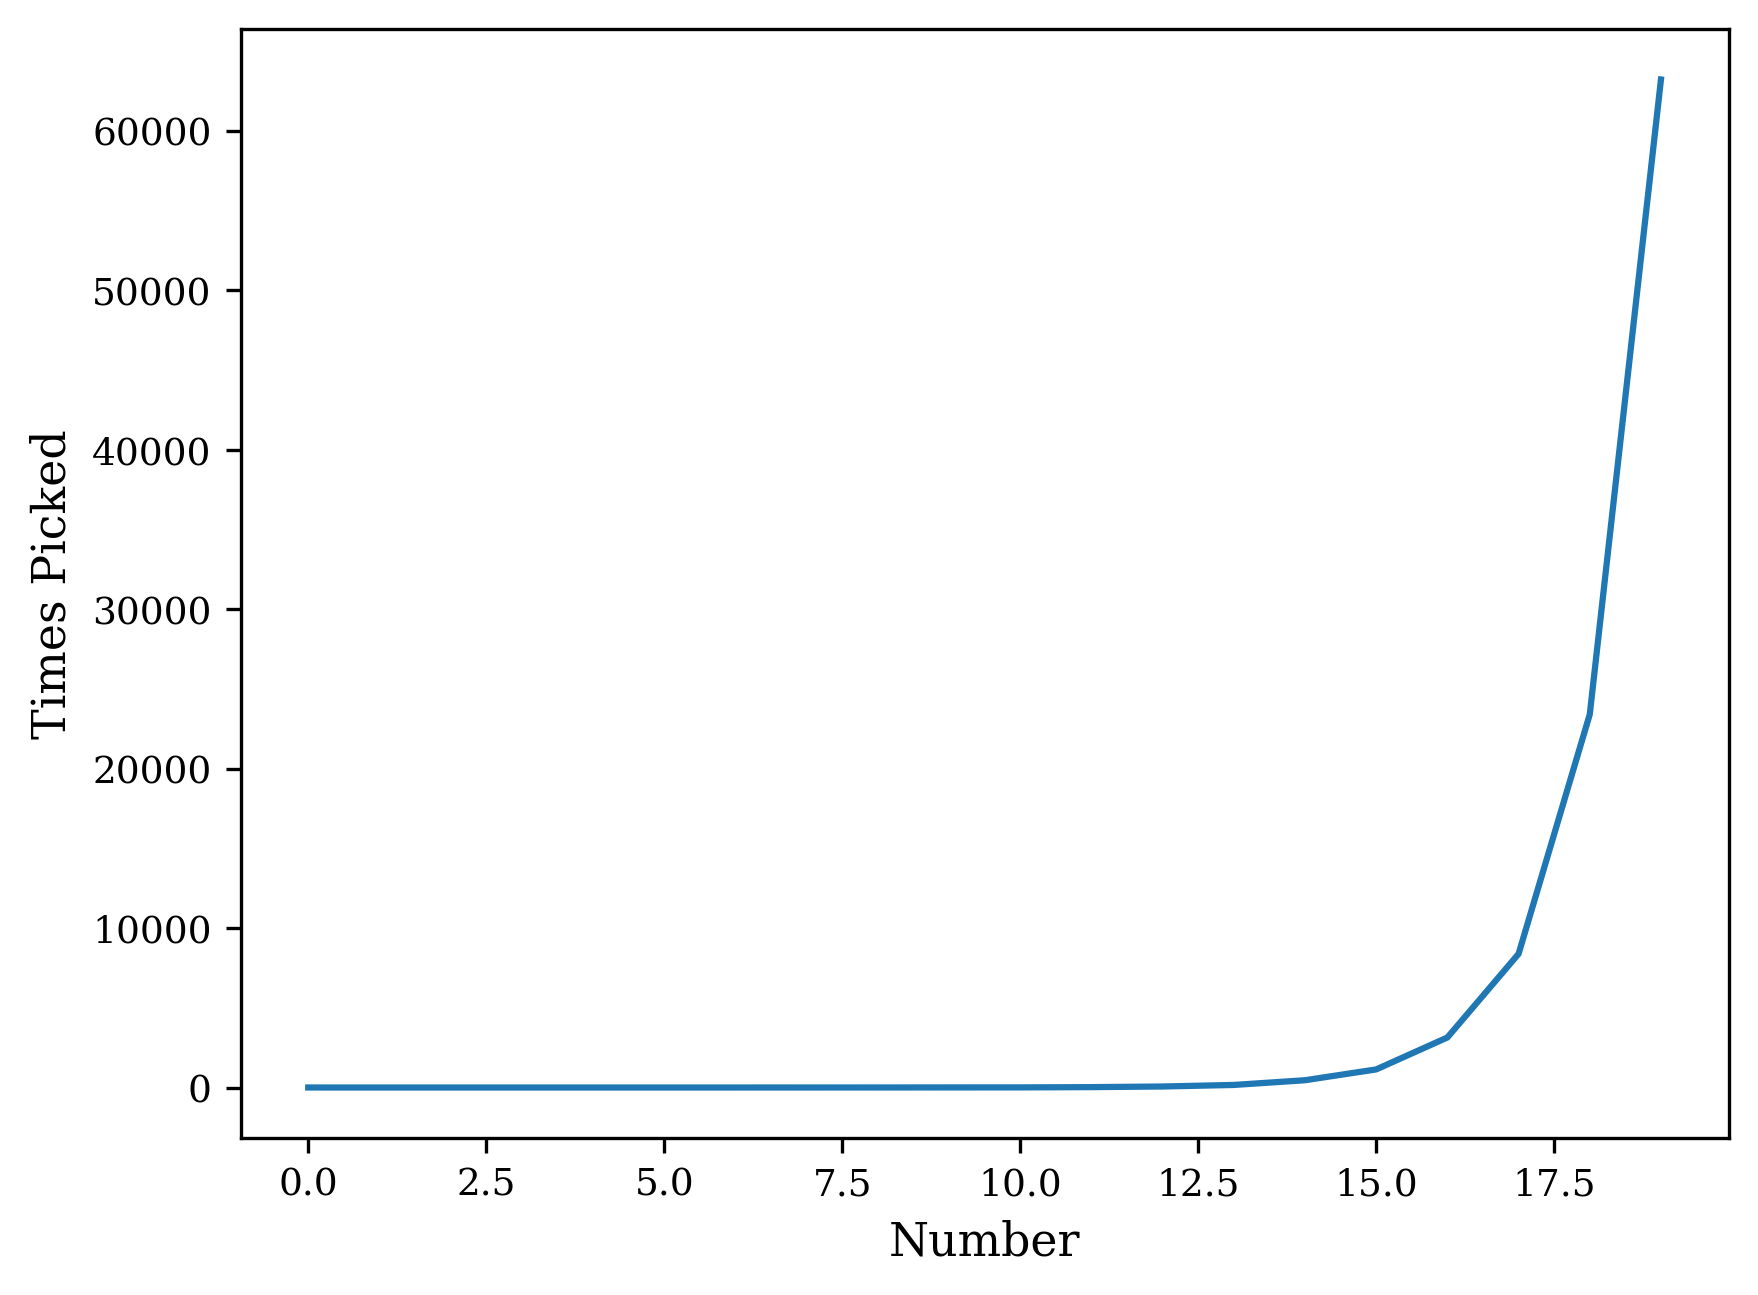

In [14]:
plot_number_picked(counts_exp_py_end_prioritized)

In [15]:
counts_exp_start_prioritized = test_pickers(ExponentialIndexRandomPicker(), False, hi=HI)

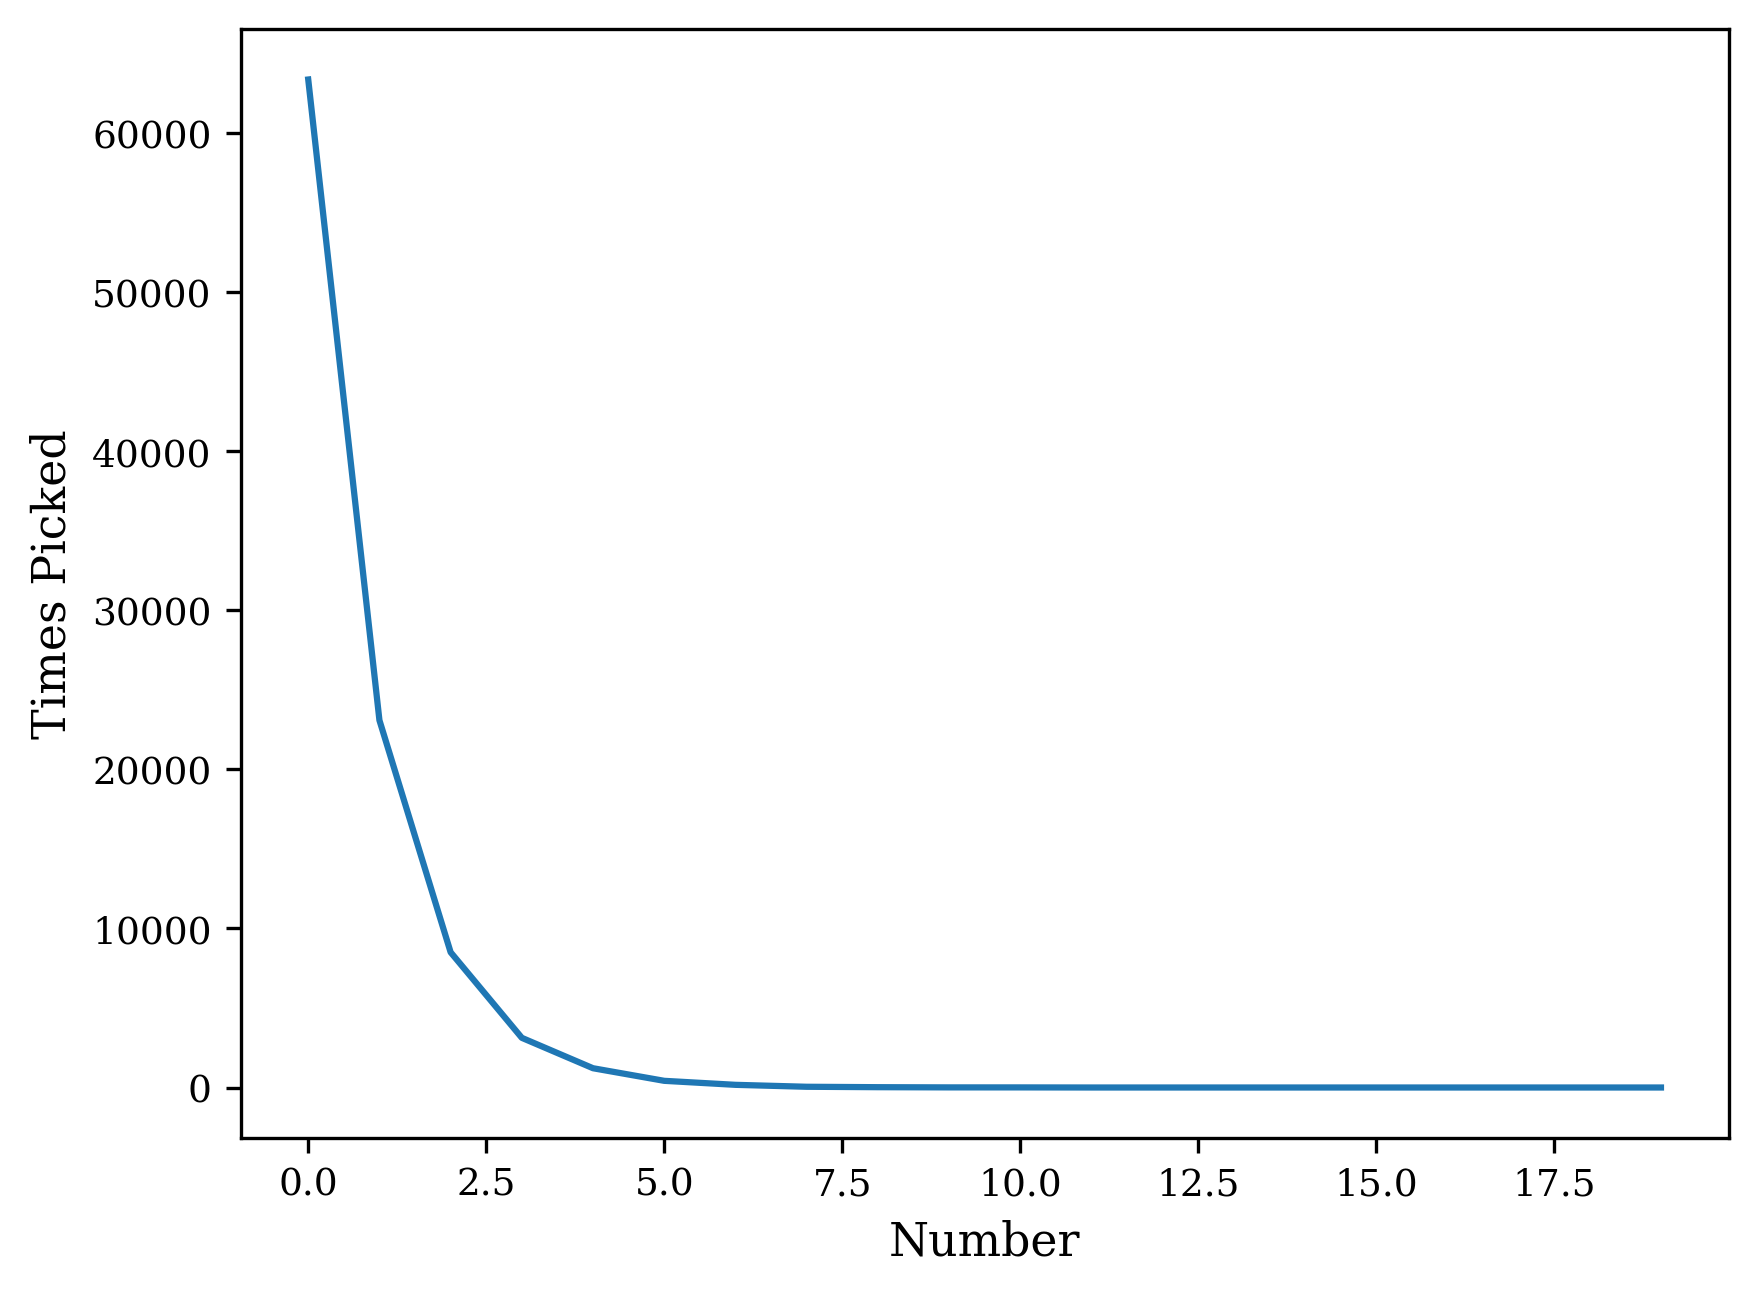

In [16]:
plot_number_picked(counts_exp_start_prioritized)

In [17]:
counts_exp_py_start_prioritized = test_pickers(PyExponentialRandomPicker(), False, hi=HI)

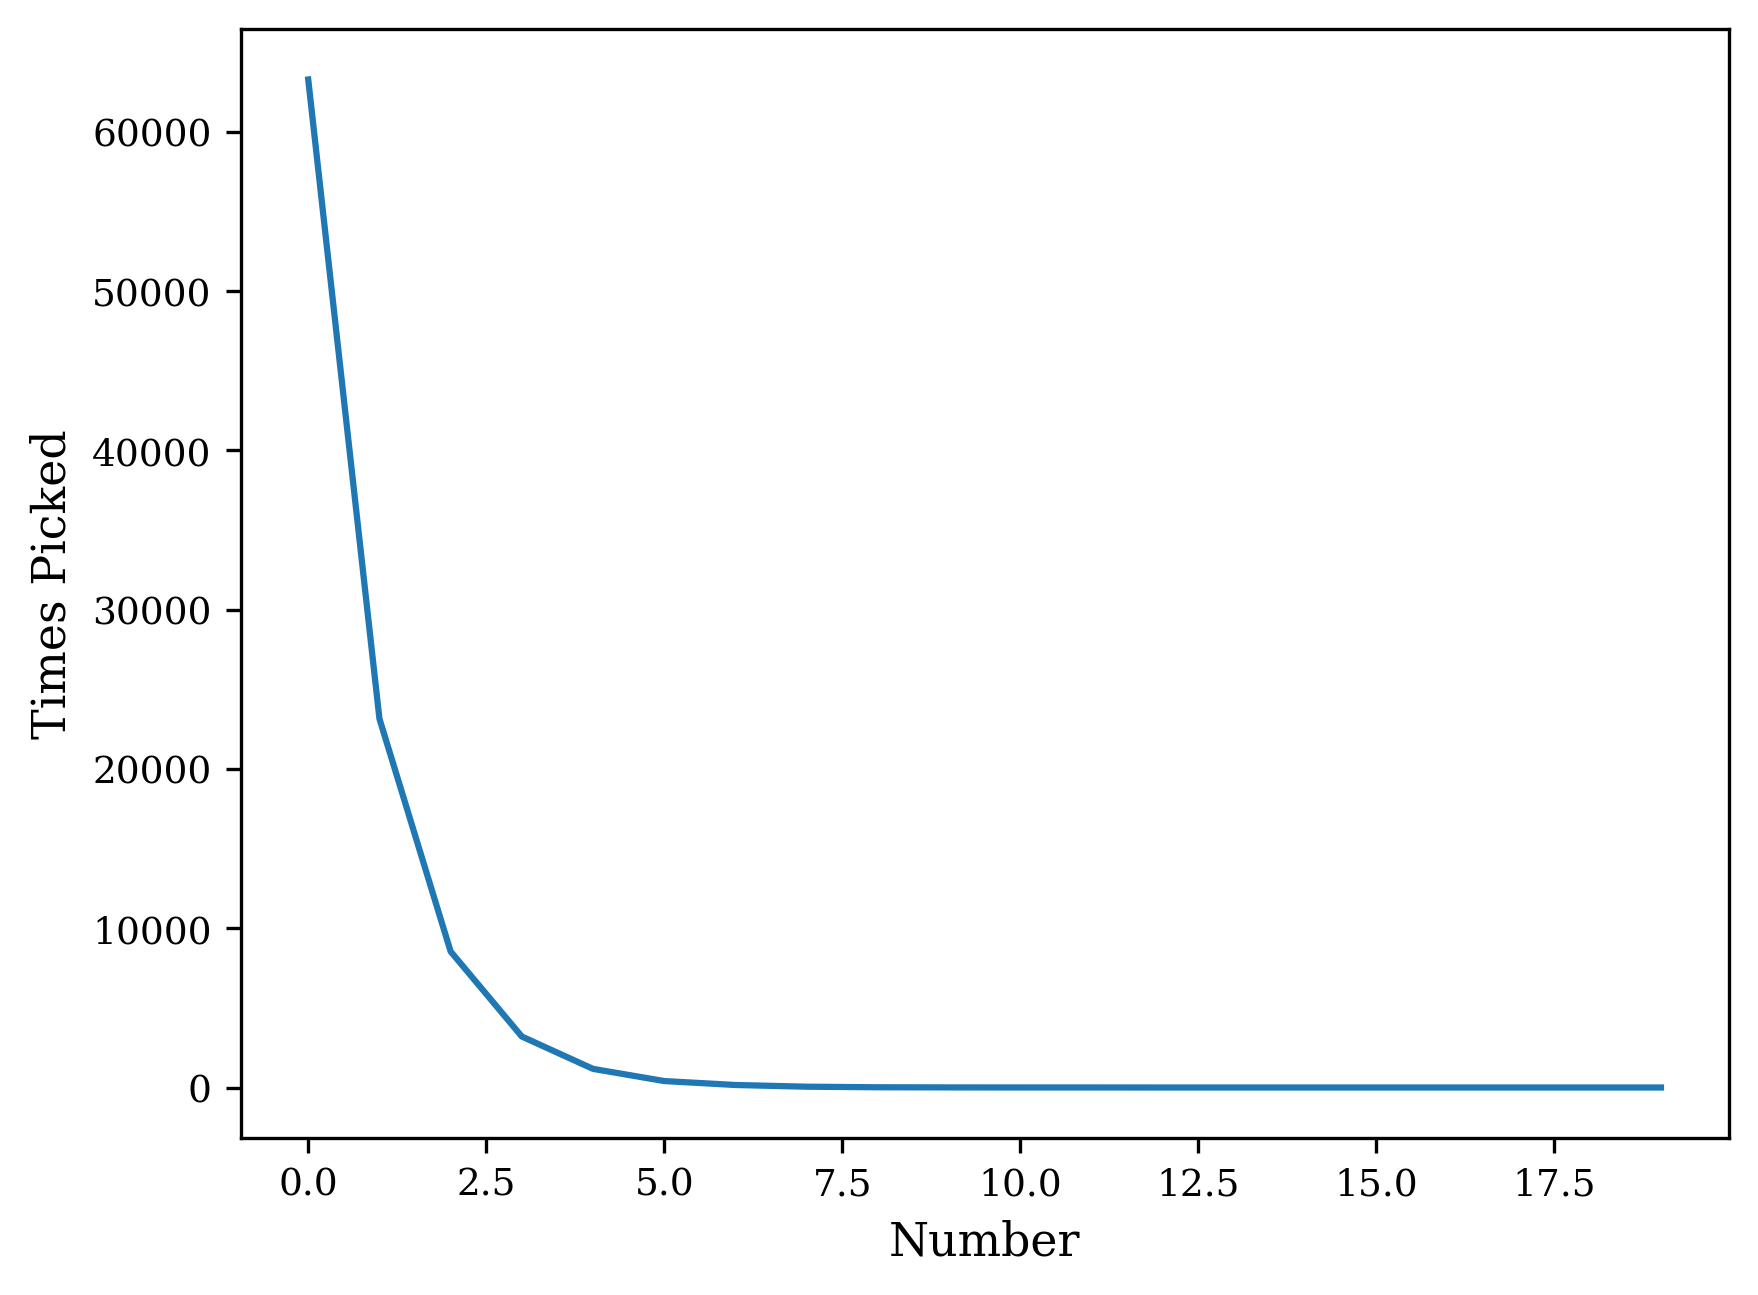

In [18]:
plot_number_picked(counts_exp_py_start_prioritized)

In [19]:
counts_uniform_end_prioritized = test_pickers(UniformRandomPicker(), True, hi=HI)

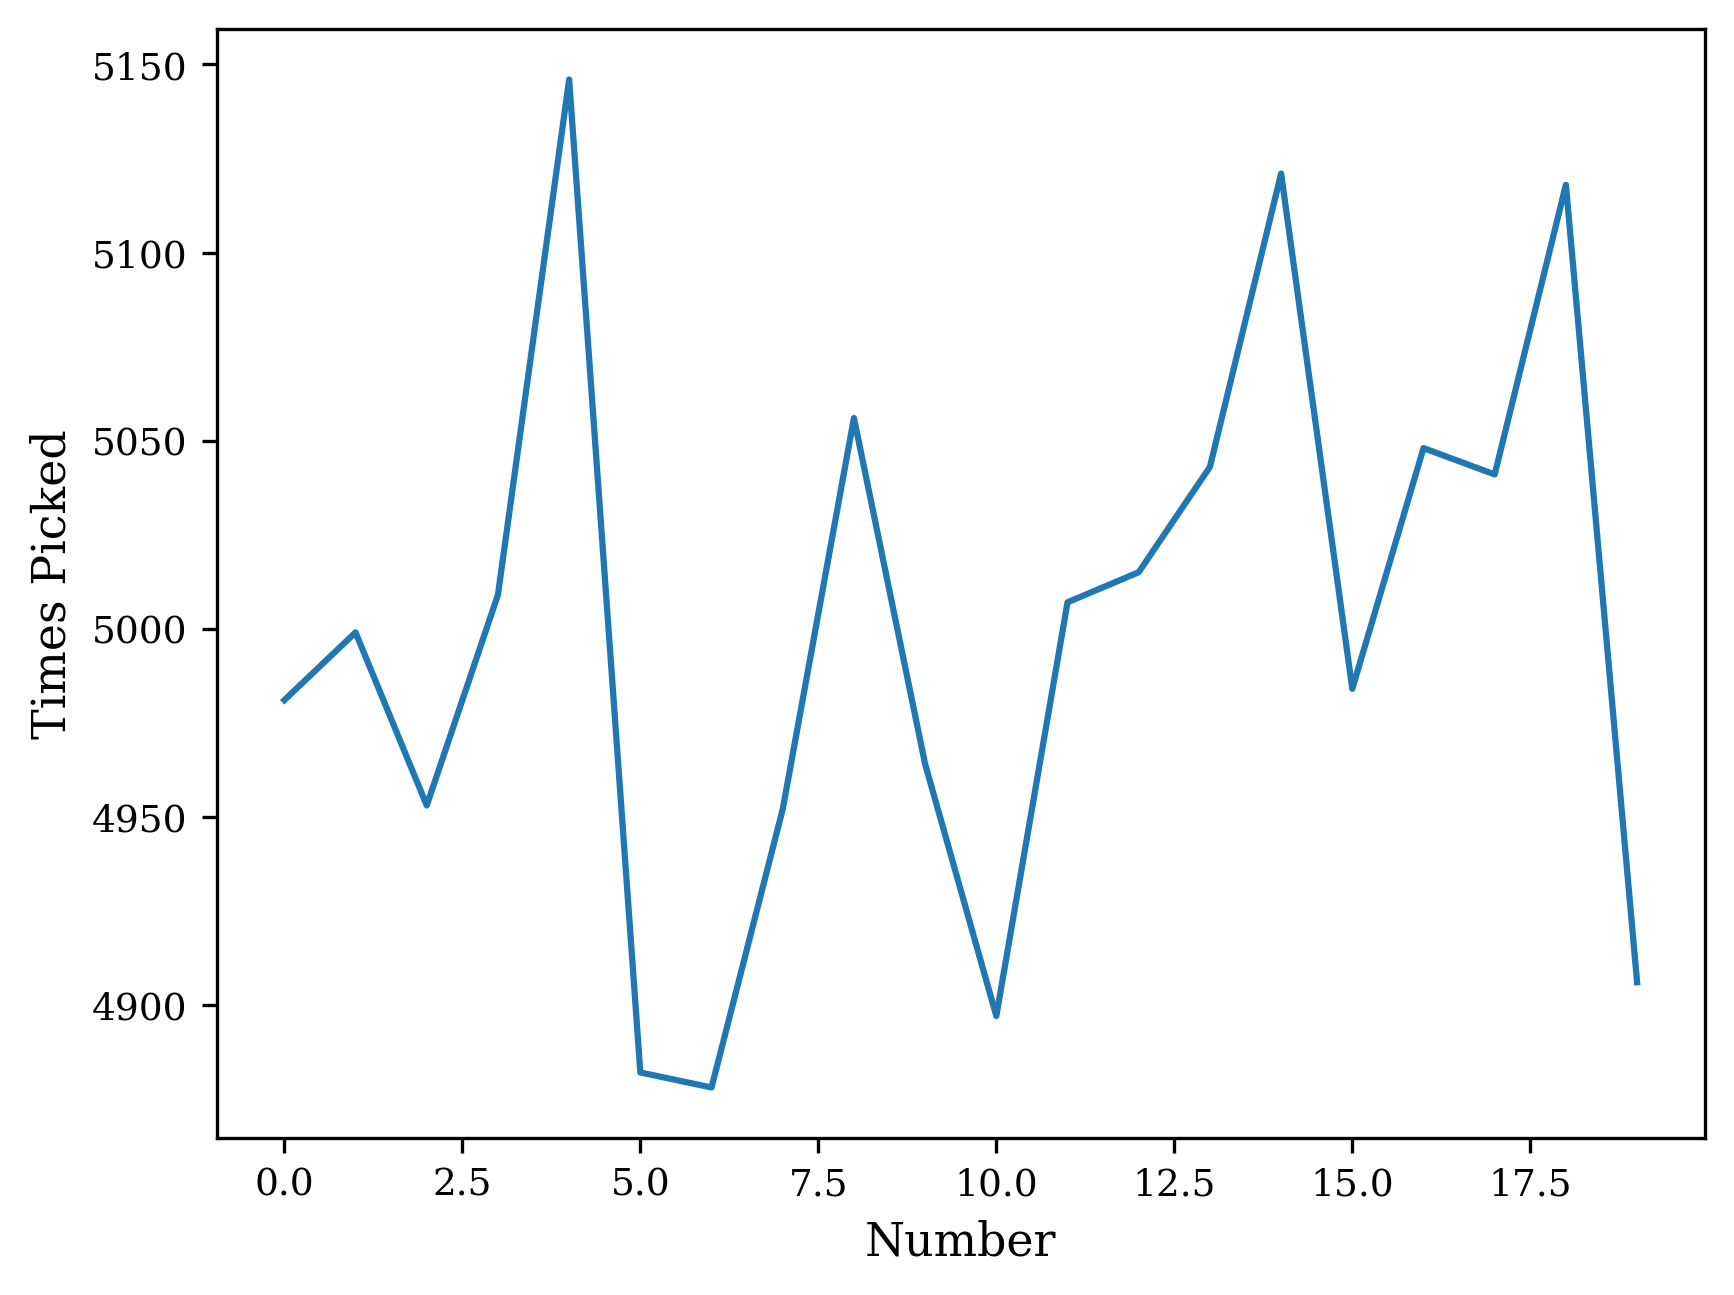

In [20]:
plot_number_picked(counts_uniform_end_prioritized)

In [21]:
counts_uniform_start_prioritized = test_pickers(UniformRandomPicker(), False, hi=HI)

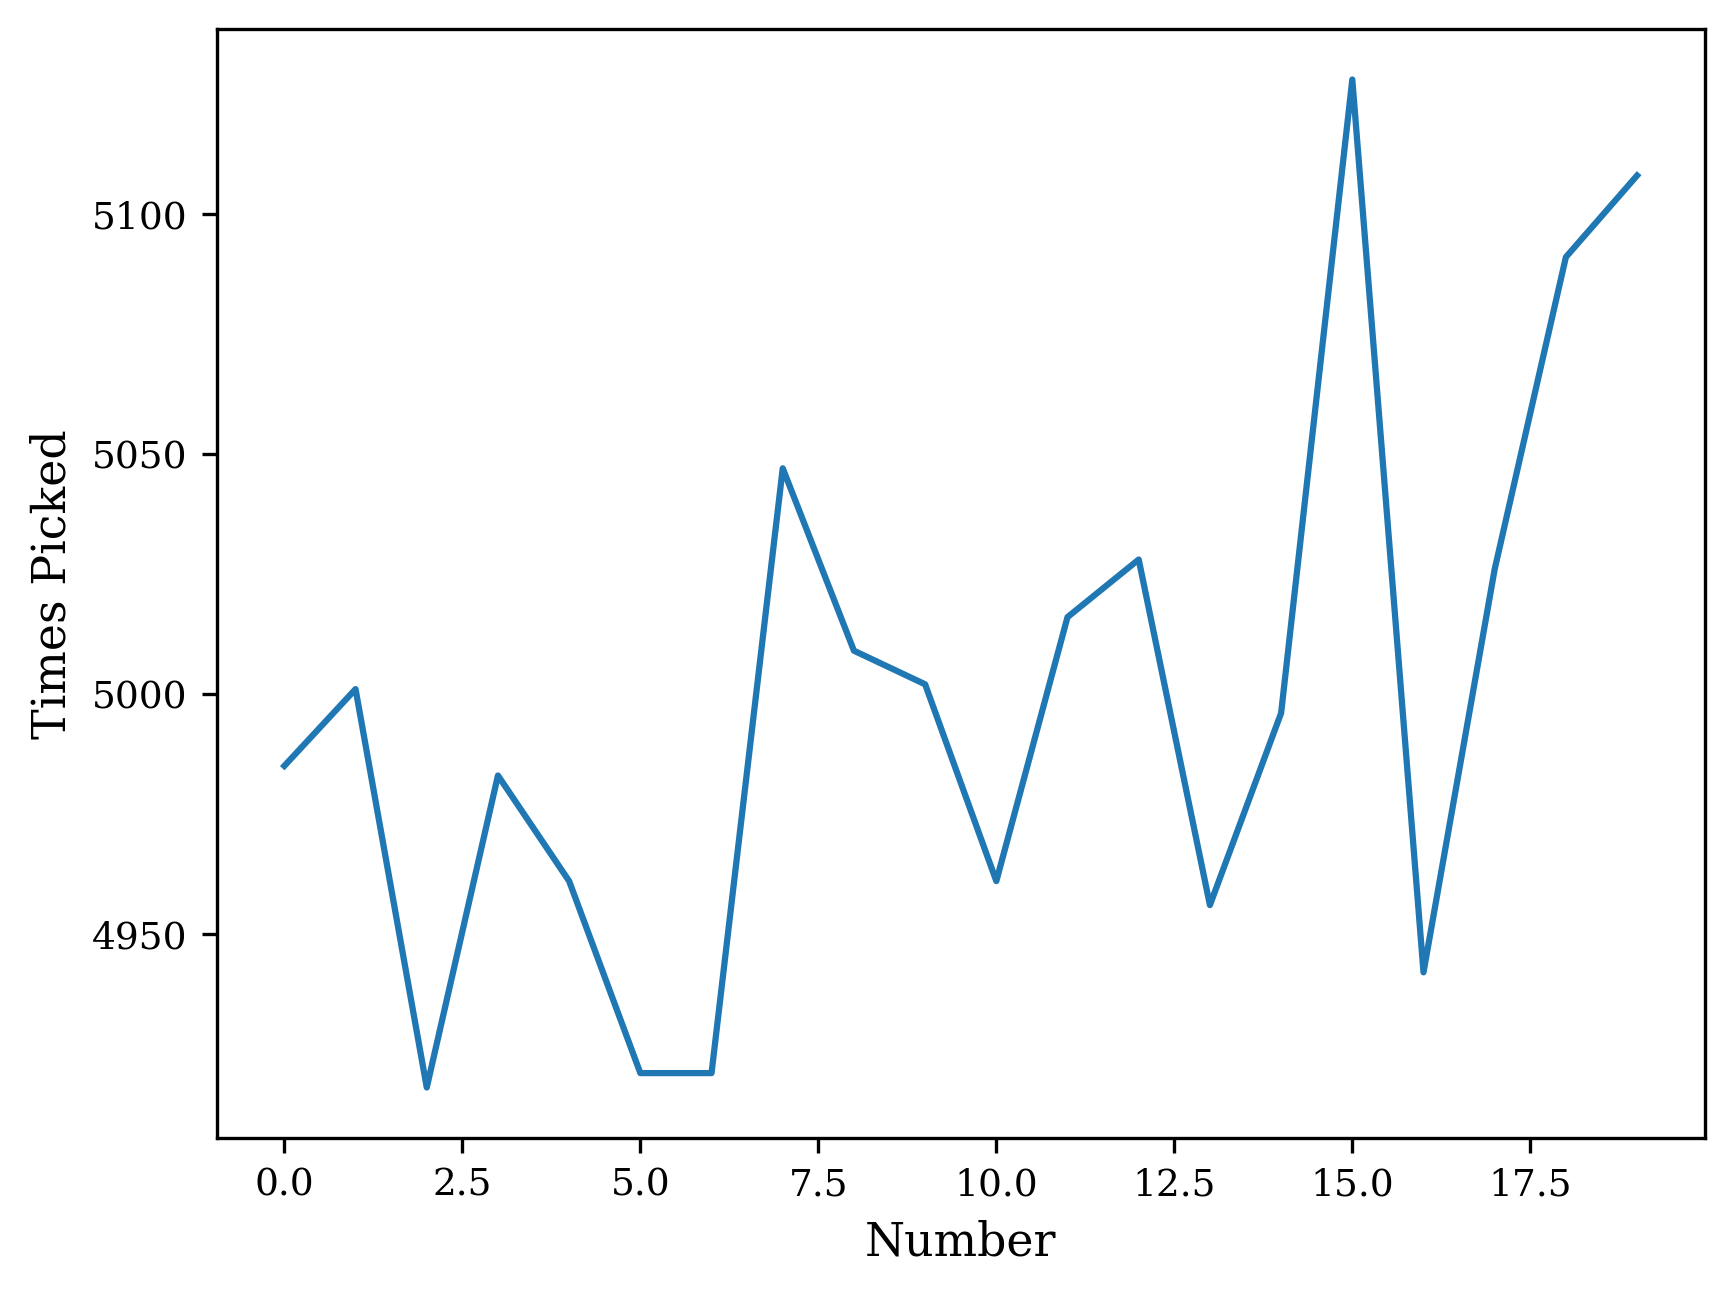

In [22]:
plot_number_picked(counts_uniform_start_prioritized)

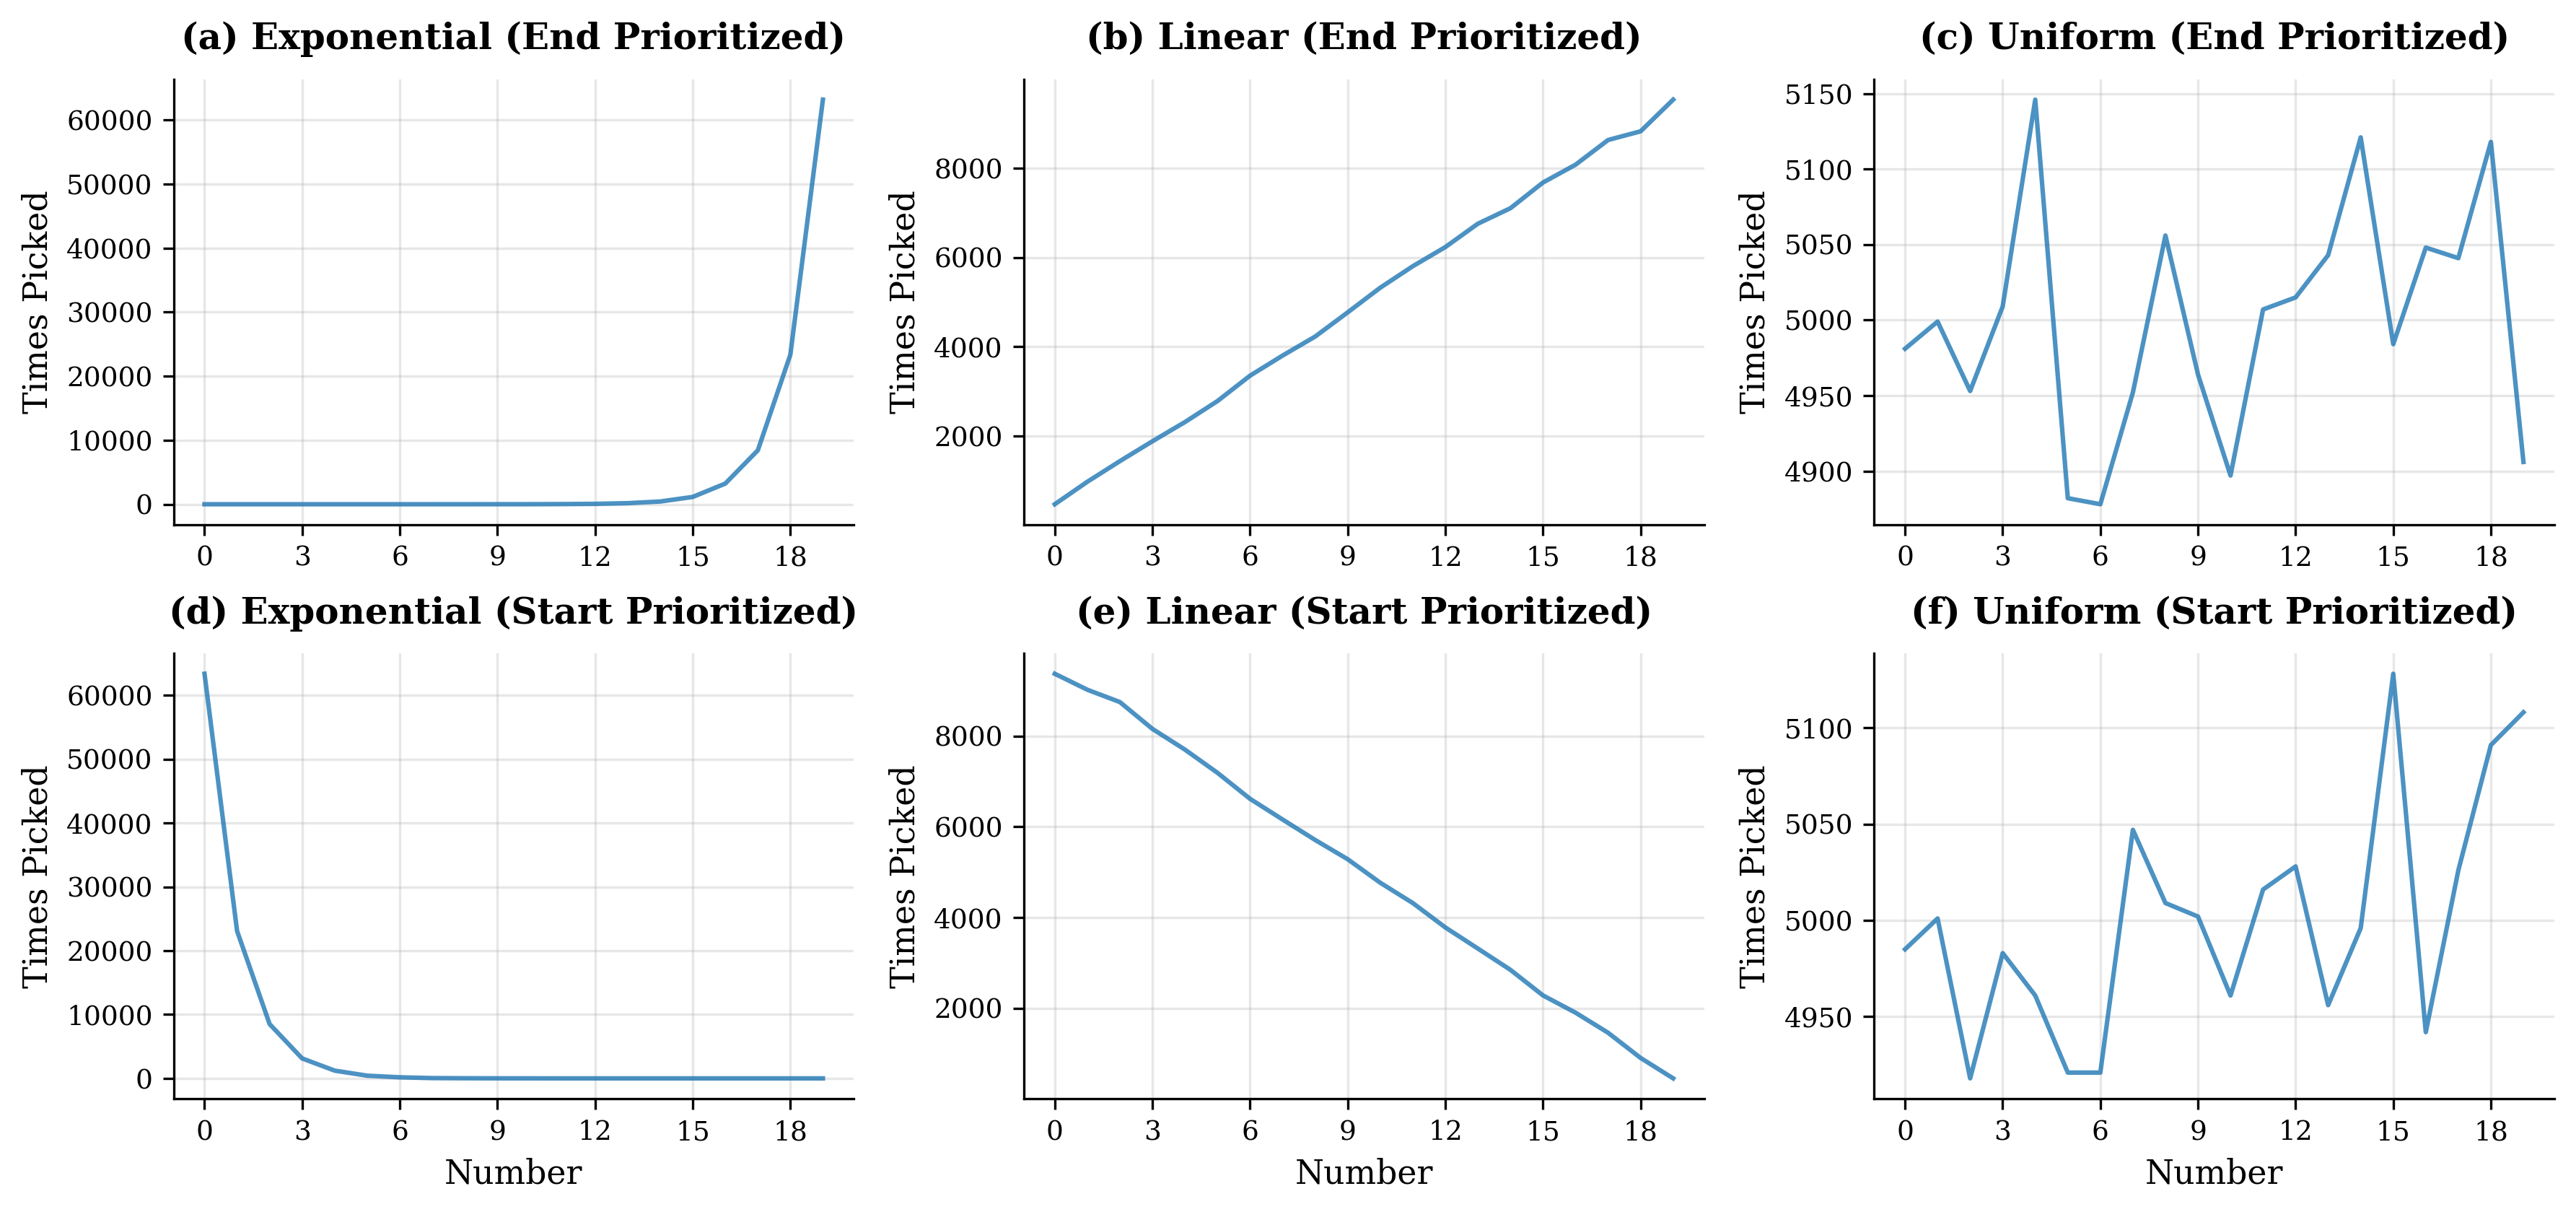

In [24]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Configure fonts and style for academic paper - matching other plots
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 10,
    'axes.labelsize': 11,
    'axes.titlesize': 12,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'text.usetex': False,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight'
})

plot_data = [
    ("Exponential (End Prioritized)", counts_exp_end_prioritized),
    ("Exponential (Start Prioritized)", counts_exp_start_prioritized),
    ("Linear (End Prioritized)", counts_linear_end_prioritized),
    ("Linear (Start Prioritized)", counts_linear_start_prioritized),
    ("Uniform (End Prioritized)", counts_uniform_end_prioritized),
    ("Uniform (Start Prioritized)", counts_uniform_start_prioritized),
]

# Create 2x3 subplot with academic styling
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

# Academic color scheme
color = '#1f77b4'  # Blue

for i in range(3):  # Columns: Exponential, Linear, Uniform
    # Top row plots
    axes[0, i].plot(plot_data[2 * i][1], color=color, linewidth=1.5, alpha=0.8)
    axes[0, i].set_title(f"({chr(97 + i)}) {plot_data[2 * i][0]}", fontweight='bold', pad=10)
    axes[0, i].set_ylabel("Times Picked")
    axes[0, i].xaxis.set_major_locator(MaxNLocator(integer=True))
    axes[0, i].grid(True, alpha=0.3)
    axes[0, i].spines['top'].set_visible(False)
    axes[0, i].spines['right'].set_visible(False)
    axes[0, i].ticklabel_format(style='plain', axis='both')

    # Bottom row plots
    axes[1, i].plot(plot_data[2 * i + 1][1], color=color, linewidth=1.5, alpha=0.8)
    axes[1, i].set_title(f"({chr(100 + i)}) {plot_data[2 * i + 1][0]}", fontweight='bold', pad=10)
    axes[1, i].set_xlabel("Number")
    axes[1, i].set_ylabel("Times Picked")
    axes[1, i].xaxis.set_major_locator(MaxNLocator(integer=True))
    axes[1, i].grid(True, alpha=0.3)
    axes[1, i].spines['top'].set_visible(False)
    axes[1, i].spines['right'].set_visible(False)
    axes[1, i].ticklabel_format(style='plain', axis='both')

# Adjust layout - matching other plots
plt.tight_layout()
plt.subplots_adjust(wspace=0.25, top=0.88)

# Save with high quality
plt.savefig('figures/random_picker_validation.pdf', format='pdf', bbox_inches='tight')
plt.savefig('figures/random_picker_validation.png', format='png', bbox_inches='tight')
plt.show()